#Hierachical Clustering

## Agglomerative Clustering

En esta técnica, inicialmente cada punto de datos se considera un grupo individual. En cada iteración, los grupos similares se fusionan con otros grupos hasta que se forman uno o K grupos.
1. Cada uno se considera único. En el paso inicial, calculamos la proximidad de puntos individuales y consideramos los seis puntos de datos como grupos individuales como se muestra en la imagen a continuación.
2. En el paso dos, los grupos similares se fusionan y se forman como un solo grupo. Consideremos que B, C y D, E son grupos similares que se fusionaron en el paso dos. Ahora, nos quedamos con cuatro grupos que son A, BC, DE, F.
En cada paso se calcula la proximidad y se llega al grupo final


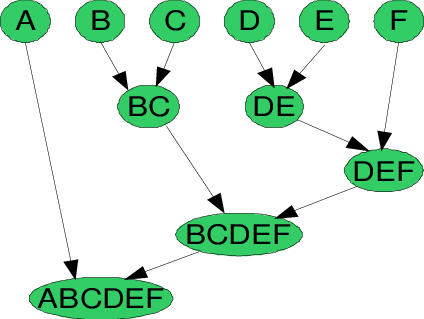

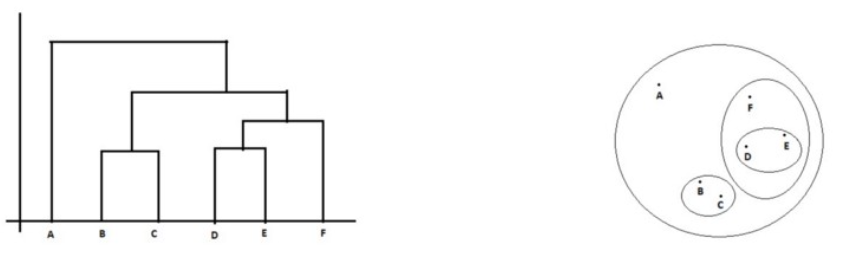

## Diviside Clustering
En palabras simples, podemos decir que el agrupamiento jerárquico divisivo es exactamente lo opuesto al agrupamiento jerárquico aglomerativo. En el agrupamiento jerárquico divisivo, consideramos todos los puntos de datos como un solo grupo y, en cada iteración, separamos los puntos de datos del grupo que no son similares. Cada punto de datos que se separa se considera un grupo individual. Al final, nos quedarán n grupos.

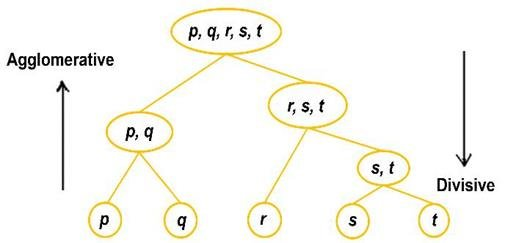

* por el tiempo de computo
* el divisivo va hacia abajo y eso te da 2 a la n -1 formas de ir partiendo tus subconjuntos y es muy caro

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn.cluster as cluster
import pandas as pd
import time
# %matplotlib inline
sns.set_context('poster')
# sns.set_color_codes()
# plot_kwds = {'alpha': 0.50, 's': 80, 'linewidths': 0}

In [2]:
#MOntar el drive en colab
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
#Leer el CSV de customers
#Icnormacion acerca de llos clientes teiendo en cuenta su genero, edad, ingreso
#en miles y spending score que es lo que gastaron este año en el mall donde 100
#es que siempre que vienen, gastan.
#importante reconocer queye el problema de porqué es clustering es porqué no sabemos
#el resultado final de estos, es decir desconocermos el target de nuestro modelo,
# la categoría de cada customer

data = pd.read_csv('/content/drive/MyDrive/Databases/Week 19/customer_mall.csv')
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
#Obtenemos unicamente features de nuestros customers
#Lo haremos con 2 para representarlo visualmente de maner sencilla
# Columna 3 y 4, todos los valores
X = data.iloc[:, [3,4]].values

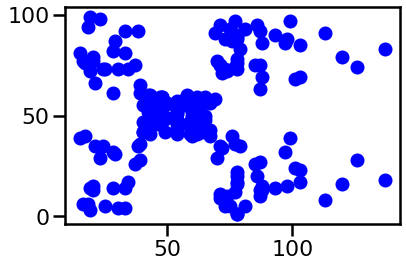

In [5]:
#Eje x nuestro income
#eje y nuestro spending score
plt.scatter(X.T[0], X.T[1], color='b')

# HDBSCAN

https://towardsdatascience.com/understanding-hdbscan-and-density-based-clustering-121dbee1320e

https://hdbscan.readthedocs.io/en/latest/how_hdbscan_works.html

Hierarchical Density-Based Spatial Clustering of Applications with Noise

HDBSCAN uses a density-based approach which makes few implicit assumptions about the clusters. It is a non-parametric method that looks for a cluster hierarchy shaped by the multivariate modes of the underlying distribution. Rather than looking for clusters with a particular shape, it looks for regions of the data that are denser than the surrounding space. The mental image you can use is trying to separate the islands from the sea or mountains from its valleys.

HDBSCAN utiliza un enfoque basado en la densidad que hace pocas suposiciones implícitas sobre los clústeres. 

Es un método no paramétrico que busca una jerarquía de conglomerados formada por los modos multivariados de la distribución subyacente. 

En lugar de buscar agrupaciones con una forma particular, busca regiones de los datos que sean más densas que el espacio circundante. 

La imagen mental que puede utilizar es intentar separar las islas del mar o las montañas de sus valles.





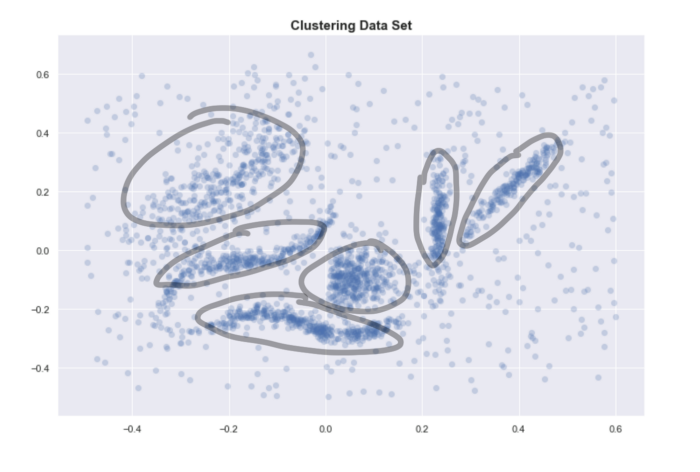

Las ventajas son:
* Fácil de implementar y no se requiere indicar el número de clusters
* El resultado es un Dendrograma que permite la visualización del resultado. \\
La desventajas son:
* Toma bastante tiempo
* No siempre es fácil identificar el número de clusters en el dendograma

## Dendogram
In hierarchical clustering, this new step also consists of finding the optimal number of clusters. Only this time we’re not going to use the elbow method. We are going to use the dendrogram.
 \\
Este paso consiste en encontrar el número óptimo de clústers. VAmos a usar kis dendogramas


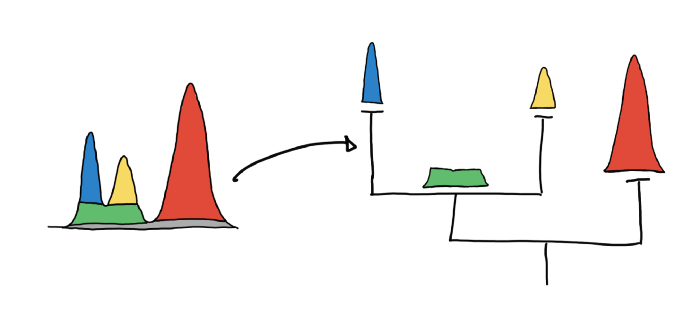

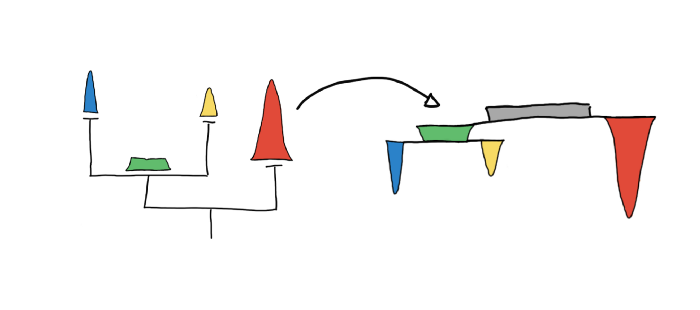

This might be appealing because of its simplicity but don’t be fooled! We end up with an extra hyperparameter, the threshold 𝜆, which we might have to fine-tune. Moreover, this doesn’t work well for clusters with different densities.

Esto puede resultar atractivo por su simplicidad, ¡pero no se deje engañar! Terminamos con un hiperparámetro adicional, el umbral 𝜆, que quizás tengamos que ajustar. Además, esto no funciona bien para clústeres con diferentes densidades.

the area of the regions is the measure of persistence, and the method is called eom or excess of mass. A bit more formally, we maximize the total sum of persistence of the clusters under the constraint that the chosen clusters are non-overlapping.

el área de las regiones es la medida de persistencia, y el método se llama eom o exceso de masa. Un poco más formalmente, maximizamos la suma total de persistencia de los clústeres bajo la restricción de que los clústeres elegidos no se superponen.

By getting multiple level-sets at different values of 𝜆, we get a hierarchy. For a multidimensional setting, imagine the clusters are islands in the middle of the ocean. As you lower the sea level, the islands will start to “grow” and eventually islands will start to connect with one another.

Básciamente lo que va ahciendo es identificar l¿puntos coenctados y creando clusters a partir de ellos:
* In a dense enough region
* Close enough to each other

A esto se le llama  **mutual reachability distance** distancia de accesibilidad mutua

In [9]:
# !pip install hdbscan

  Using cached hdbscan-0.8.27.tar.gz (6.4 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.27-cp37-cp37m-linux_x86_64.whl size=2311872 sha256=dca5bfeb5e4803de4a602bc24d4d4e3f84777c0bd891f259ebbcf5c3001484c5
  Stored in directory: /root/.cache/pip/wheels/73/5f/2f/9a259b84003b84847c259779206acecabb25ab56f1506ee72b
Successfully built hdbscan


In [10]:
import scipy.cluster.hierarchy as sch
import hdbscan

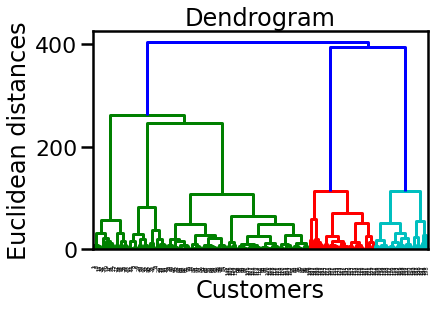

In [11]:
#El eje X son los customers, eje y es la distancia euclidiana entre los clusters
#Miramos  la distancia vertical más larga con la cual podríamos cruzar una linea
# horizontal y contamos con cuantas otras lineas se cruza
# Igual, en caso de tener más ramificaciones, podemos seguir subiendo nuestra linea
# y visualizando nuestroscluster para ver el cambi y mejora

# Ward  generalmente crea clústeres compactos y de tamaño uniforme
dendrogram = sch.dendrogram(sch.linkage(X, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [12]:
#Seleccionando el minimo de clusters del dendograma
#Generando el min span tree
# We use the parameter min_cluster_size to smoothen the curves of the estimated
#  distribution and as a result, simplifying the tree into the condensed_tree_
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, gen_min_span_tree=True)

clusterer.fit(X)


HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
        approx_min_span_tree=True, cluster_selection_epsilon=0.0,
        cluster_selection_method='eom', core_dist_n_jobs=4,
        gen_min_span_tree=True, leaf_size=40,
        match_reference_implementation=False, memory=Memory(location=None),
        metric='euclidean', min_cluster_size=5, min_samples=None, p=None,
        prediction_data=False)

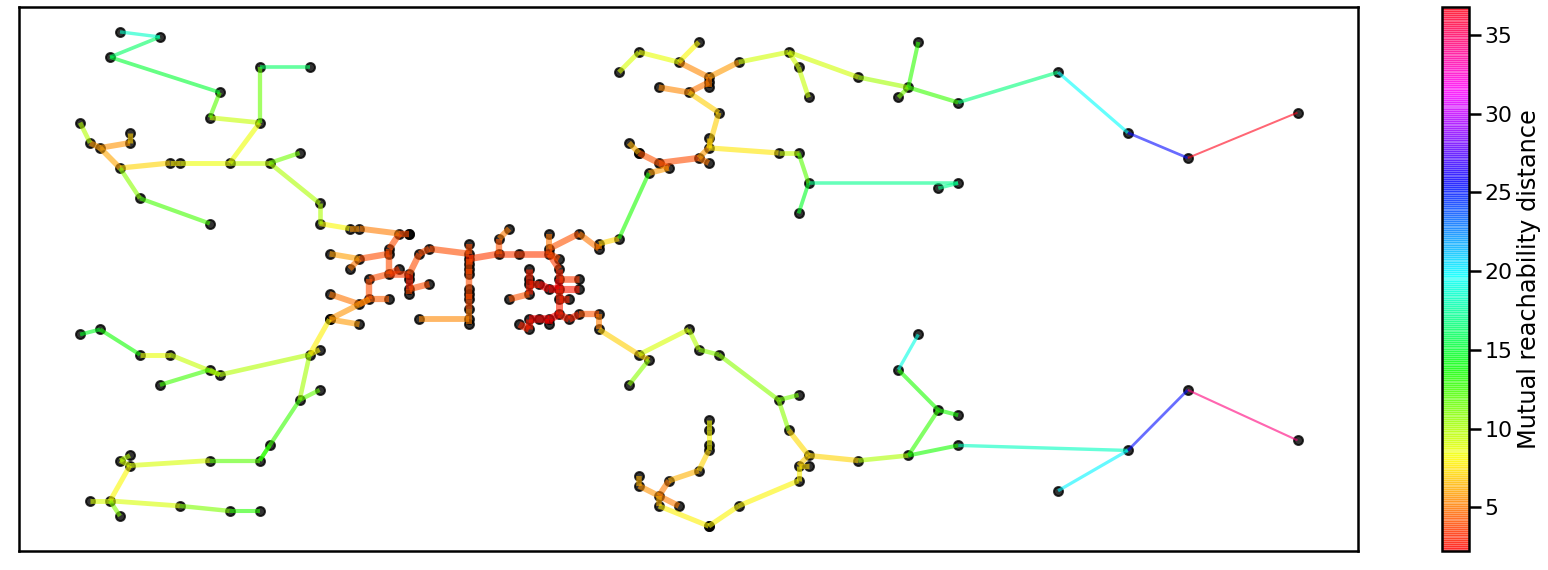

In [13]:
#Visualizando min span tree
#The mutual reachability distance is a summary at what level of 𝜆 two points 
#together will connect. This is what we use as a new metric.
# Building the minimum spanning tree is equivalent to single linkage clustering in
#𝜆-space, which is equivalent to iterating through every possible level-set and keeping track of the clusters.
# DOnde el color sea más cercano a cero hay mayor densidad, posiblemente sea un
#cl´suter
from matplotlib.pyplot import figure
figure(figsize=(30,10))
clusterer.minimum_spanning_tree_.plot(edge_cmap='hsv', edge_alpha=0.6, node_size=80, edge_linewidth=2)

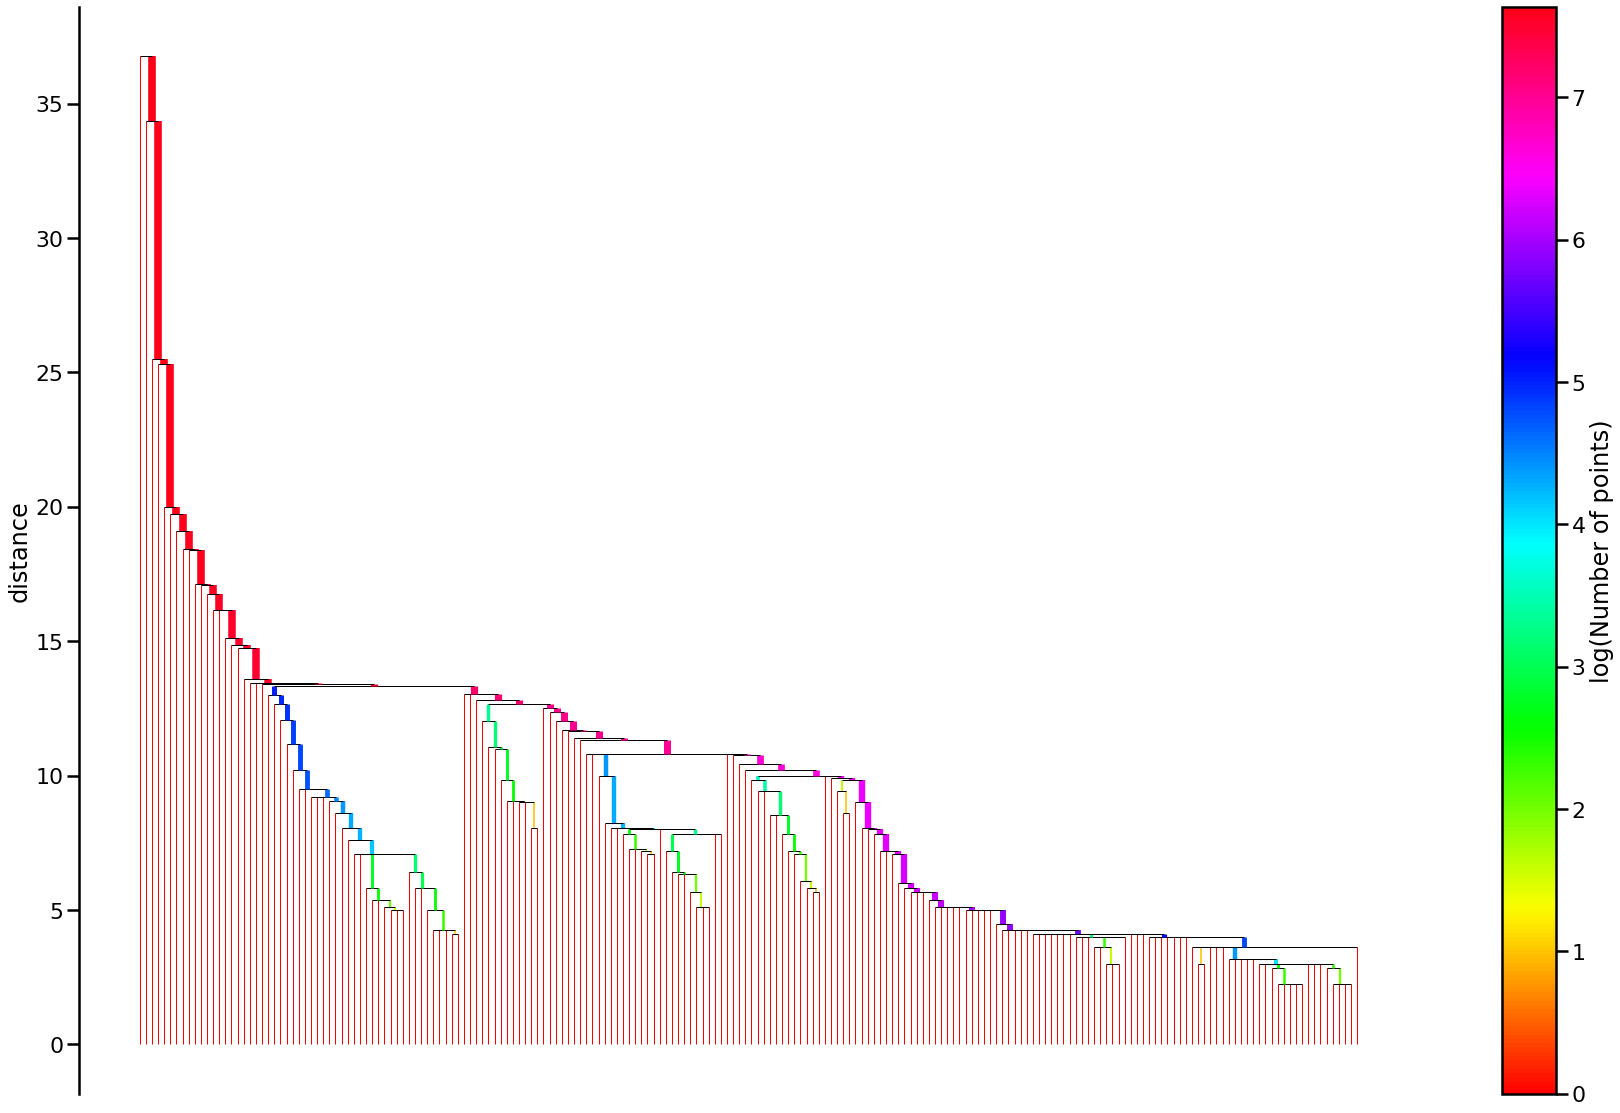

In [14]:
#Aglomerativamente podemos ver todo nuestro arbol de conexiones
figure(figsize=(30,20))
clusterer.single_linkage_tree_.plot(cmap='hsv', colorbar=True)

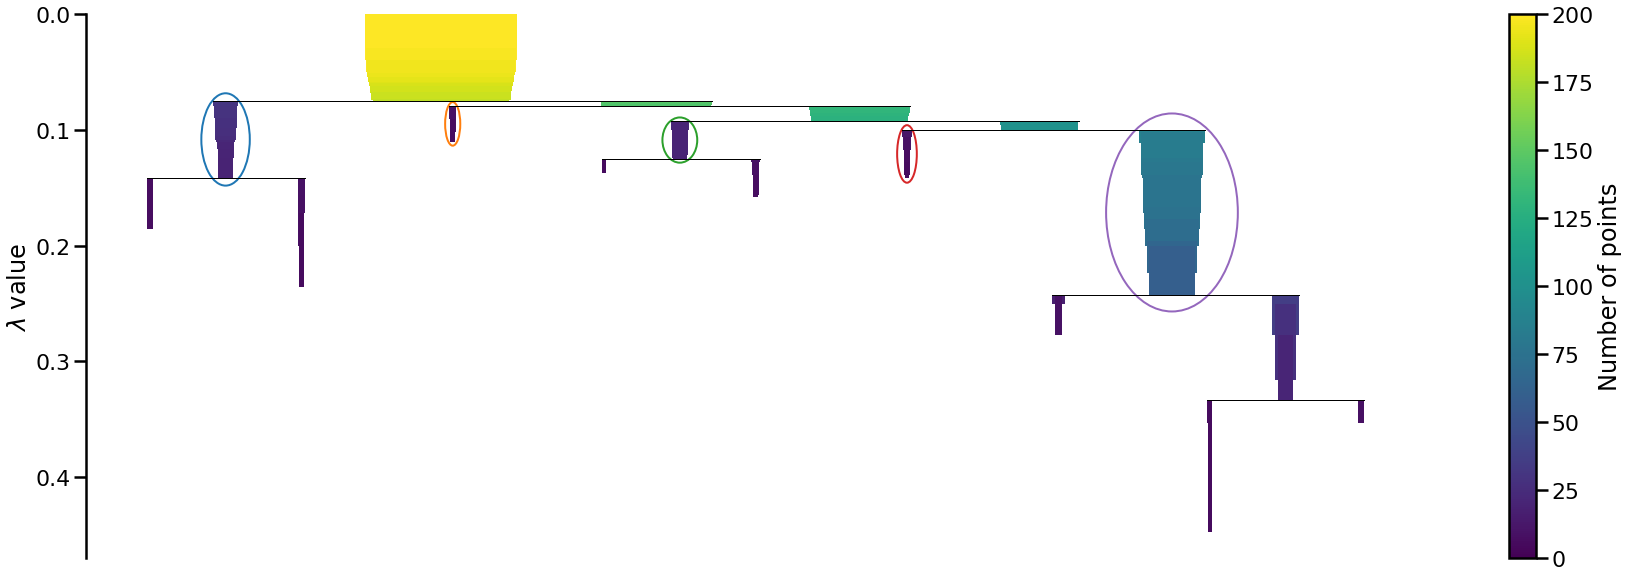

In [15]:
# Using the condensed tree, we can estimate the persistence of each cluster 
# and then calculate for the optimal clustering 
#Vemos el consensado, el cual nos da el numero de cluster a tomar en cuenta.

figure(figsize=(30,10))
clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())

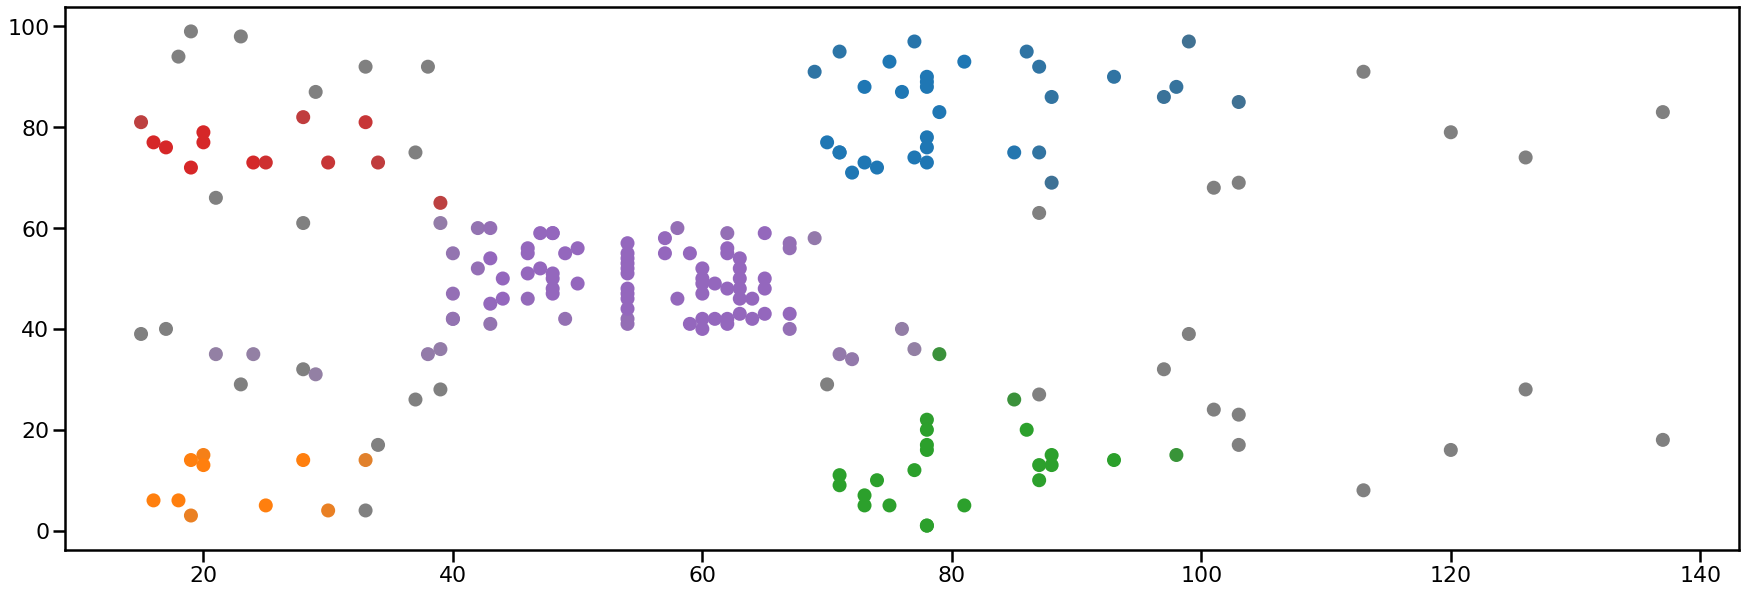

In [16]:
palette = sns.color_palette()
#Asignamos color con desaturate de Seabront
#Los que no tengan probabilidad de un cluster los dejamos grises
clusterer_colors = [sns.desaturate(palette[col], sat)
                    if col >= 0 else (0.5, 0.5, 0.5) for col, sat in zip(clusterer.labels_, clusterer.probabilities_)
                  ]

                  
figure(figsize=(30,10))
plt.scatter(X.T[0], X.T[1], c=clusterer_colors)

#GMM

https://www.analyticsvidhya.com/blog/2019/10/gaussian-mixture-models-clustering/

GMM asumismos que hay cierto numero de distribuciones gausiana y cada una de ellas representa un cluster. Teindre a grupar los puntos que pertenenecen a una fistribucion de manera conjunta

In [17]:
#trabajar con 2 variables
#Elegí Income y ChildPoverty
x_frame= pd.DataFrame(X)
x_frame.columns=['AnnualIncome', 'SpendingScore']



In [18]:
x_frame

,AnnualIncome,SpendingScore
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


<Figure size 2160x720 with 0 Axes>

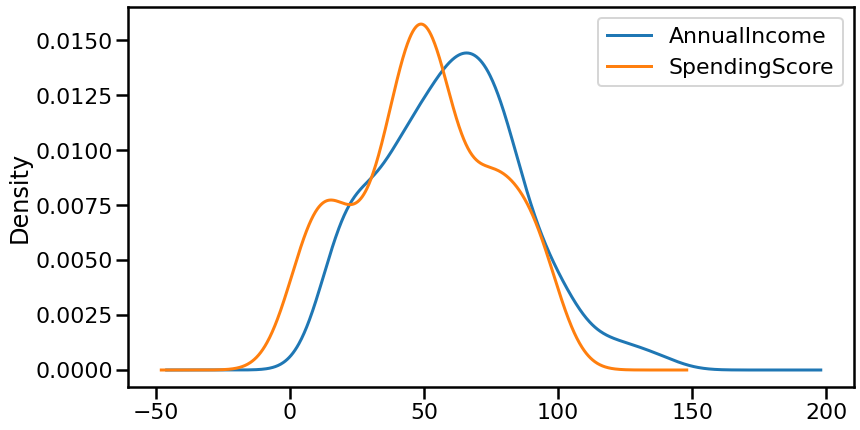

In [19]:
#Visualizando que si se comporte normalmente
figure(figsize=(30,10))
#kernel density estimation (KDE) is a non-parametric way to estimate the probability density function (PDF) of a random variabl
x_frame.plot(kind = "kde",figsize=(13, 7))
plt.show()

In [20]:
from sklearn.mixture import GaussianMixture as GMM

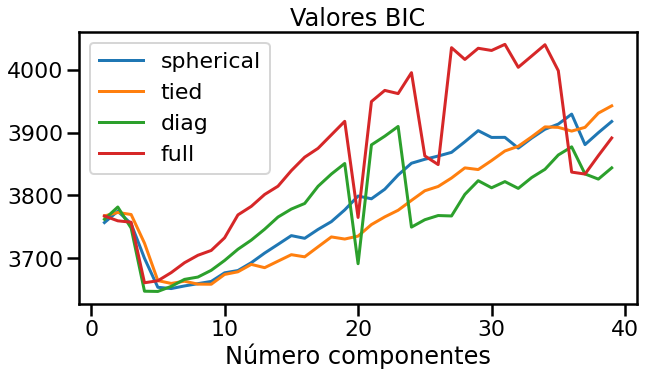

In [21]:
# Al tratarse de un problema no supervisado, no hay forma de conocer de antemano 
# el número de componentes y tipo de matriz de covarianza óptimos. Afortunadamente
# , al ser un modelo probabilístico, se puede recurrir a métricas como 
# Bayesian information criterion (BIC) para identificar 
# cómo de bien se ajustan los datos observados al modelo creado, a la vez que 
# se controla el exceso de overfitting. En la implementación de Scikit Learn, 
# para ambas métricas, cuanto más bajo el valor, mejor.

# https://machinelearningmastery.com/probabilistic-model-selection-measures/
# Note that, compared to AIC […], this penalizes model complexity more heavily.


fig, ax = plt.subplots(figsize=(10, 5))

n_components = range(1, 40)
covariance_types = ['spherical', 'tied', 'diag', 'full']

for covariance_type in covariance_types:
    valores_bic = []
    
    for i in n_components:
        modelo = GMM(n_components=i, covariance_type=covariance_type, random_state=123)
        modelo = modelo.fit(X)
        valores_bic.append(modelo.bic(X))
        
    ax.plot(n_components, valores_bic, label=covariance_type)
ax.set_title("Valores BIC")
ax.set_xlabel("Número componentes")
ax.legend();

In [22]:

#Full means the components may independently adopt any position and shape.
# 5 componenestes que es cuando el eje y es menor para todas
#https://stats.stackexchange.com/questions/326671/different-covariance-types-for-gaussian-mixture-models
gm = GMM(n_components=5, covariance_type='full',random_state=123)
gm.fit(X)



GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=5, n_init=1, precisions_init=None,
                random_state=123, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

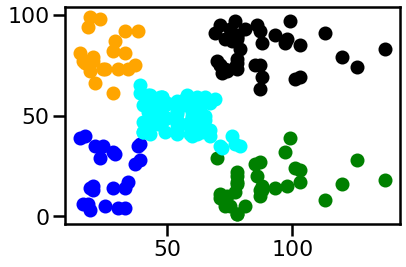

In [23]:
#Predecimos el cluster
labels = gm.predict(X)
#Transformamos a DF y aggrgamos neustro cluster para ver
frame = pd.DataFrame(X)
frame['cluster'] = labels
frame.columns = ['AnnualIncome', 'SpendingScore', 'cluster']
#GRaficamos
color=['blue','green','cyan', 'black','orange']
for k in range(0,5):
    data = frame[frame["cluster"]==k]
    plt.scatter(data["AnnualIncome"],data["SpendingScore"],c=color[k])
plt.show()

In [24]:
labels

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 3, 2, 3, 1, 3, 1, 3,
       2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 2, 3, 1, 3, 2, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3])

In [25]:
frame

,AnnualIncome,SpendingScore,cluster
0,15,39,0
1,15,81,4
2,16,6,0
3,16,77,4
4,17,40,0
...,...,...,...
195,120,79,3
196,126,28,1
197,126,74,3
198,137,18,1


#Visualizando Clusters

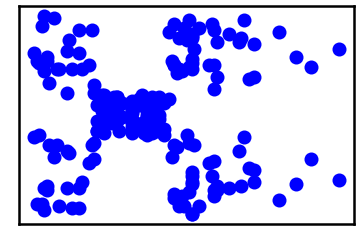

In [26]:
plt.scatter(X.T[0], X.T[1], c='b')
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)

In [27]:
def plot_clusters(data, algorithm, args, kwds):
  #Tiempo para ver demora
    start_time = time.time()
    #genrando clusters, pasamos args, data y keywords
    labels = algorithm(*args, **kwds).fit_predict(data)
    end_time = time.time()
    #Colores
    palette = sns.color_palette('deep', np.unique(labels).max()+1) 
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    plt.scatter(data.T[0], data.T[1], c=colors)
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    plt.title('Clusters encontrados por {}'.format(str(algorithm.__name__)), fontsize = 24)
    plt.text(-0.6, 1, 'Clusterización en {:.2f} segs'.format(end_time - start_time), fontsize=14)

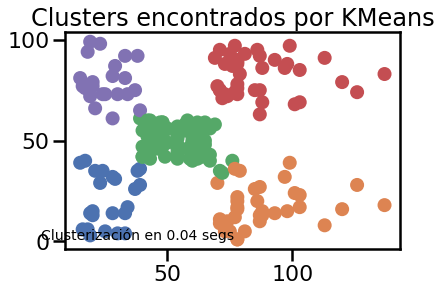

In [28]:
plot_clusters(X, cluster.KMeans, (), {'n_clusters':5,'random_state':123})

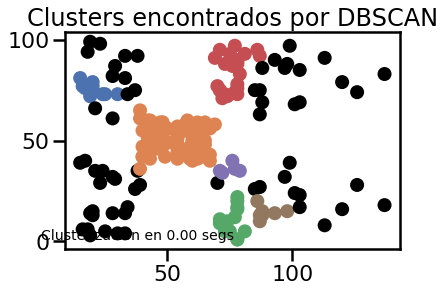

In [29]:
plot_clusters(X, cluster.DBSCAN, (), {'eps': 6.2})

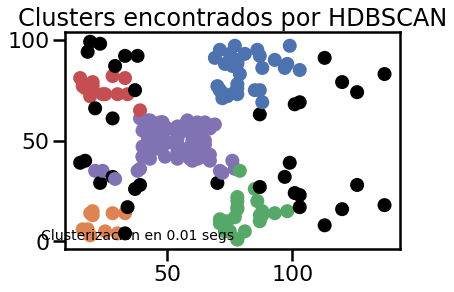

In [30]:
import hdbscan
plot_clusters(X, hdbscan.HDBSCAN, (), {'min_cluster_size': 5})

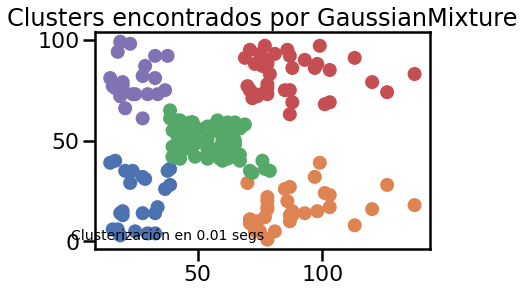

In [31]:
from sklearn.mixture import GaussianMixture as GMM
plot_clusters(X, GMM, (), {'n_components': 5, 'covariance_type':'full','random_state':123})

https://hdbscan.readthedocs.io/en/latest/comparing_clustering_algorithms.html